In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

## PROPERTIES OF PN SEQUENCE

Text(0.5, 1.0, 'PN SEQUENCE')

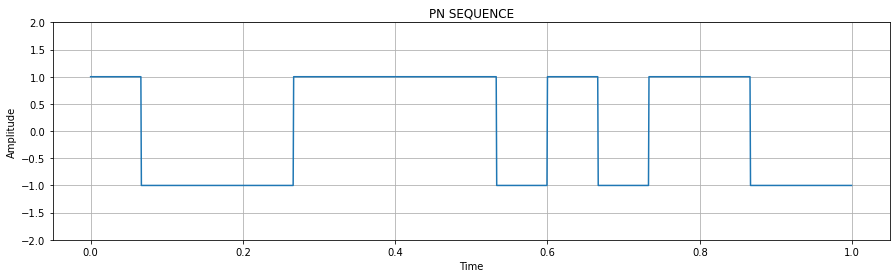

In [ ]:
plt.figure(figsize=(15,4))
t1 = np.linspace(0, 1, 1500, endpoint=False)
pn = max_len_seq(4,state = [1,0,0,0])[0]
code3 = np.ones(1500)
j = 0
for i in range(1500):
  if i%100==0 and i!=0:
    j+=1
  code3[i] = code3[i]*pn[j]*2-1
plt.plot(t1,code3)
plt.ylim(-2, 2)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('PN SEQUENCE')

In [ ]:
pn_npz = pn*2-1
pn_npz

array([ 1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1],
      dtype=int8)


## BALANCE_PROPERTY

In [ ]:
#BALANCE PROPERTY

ones = 0
zeros = 0
for seq in pn:
  if seq:
    ones+=1
  else:
    zeros+=1

print(f'Number of Ones: {ones}')
print(f'Number of Zeros: {zeros}')

Number of Ones: 8
Number of Zeros: 7


## RUN PROPERTY

In [ ]:
#RUN PROPERTY

runs = 1
for i in range(len(pn)-1):
  if(pn[i+1]!=pn[i]):
    runs+=1
      
print(f'Number of Runs: {runs}')

Number of Runs: 8


## Auto Correlation

Text(0.5, 1.0, 'Auto_Correlation')

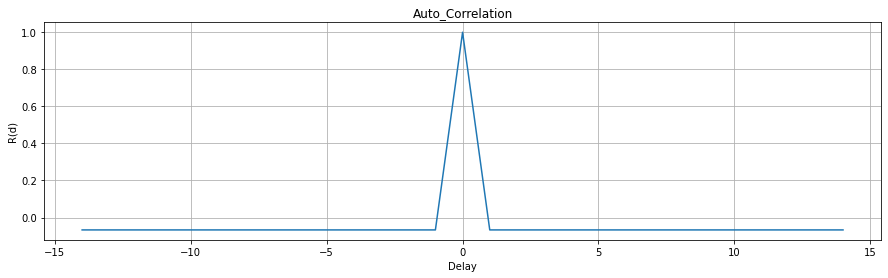

In [ ]:
def auto_correlation(c):
  r = []
  for d in range(len(c)):
    sums = 0
    for i in range(len(c)):
      sums+=(c[i]*c[i-d])
    r.append(sums/(len(c)))
  return r
R1 = auto_correlation(pn_npz)
R = []
R[:15] = R1[::-1]
R[15:30] = R1[1:15]
plt.figure(figsize=(15,4))
delay = np.linspace(-14, 15,29, endpoint=False)
plt.plot(delay,R)
plt.grid()
plt.xlabel('Delay')
plt.ylabel('R(d)')
plt.title('Auto_Correlation')

##CODE DIVISION

# **Data Input**

In [410]:
def signal_plot(arr,label):
  sig = []
  
  for i in range(len(arr)):
    sig.append(np.ones(50)*arr[i])
  sig = (np.array(sig)).flatten()
  t = np.linspace(0, len(arr), len(sig), endpoint=False)
  plt.figure(figsize=(15,4))
  plt.grid()
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.plot(sig,'r')
  plt.ylim(min(sig)-1,max(sig)+1)
  plt.title(label)

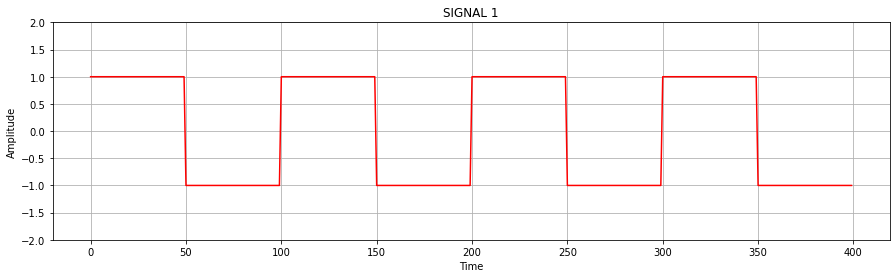

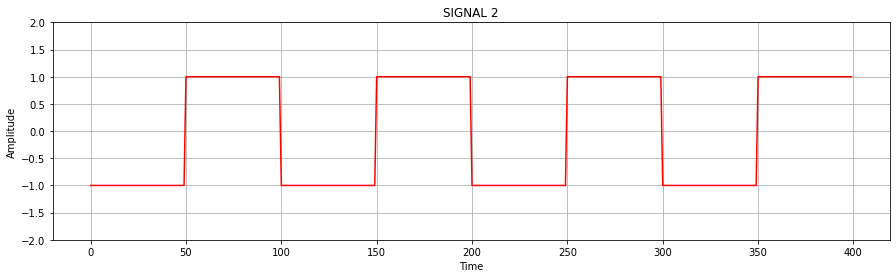

In [411]:
sig1 = [1,0,1,0,1,0,1,0]

sig2 = [0,1,0,1,0,1,0,1]

sig1 = np.array(sig1)*2-1
sig2 = np.array(sig2)*2-1

signal_plot(sig1,label = 'SIGNAL 1')
signal_plot(sig2,label = 'SIGNAL 2')

# **PN SEQUENCE**

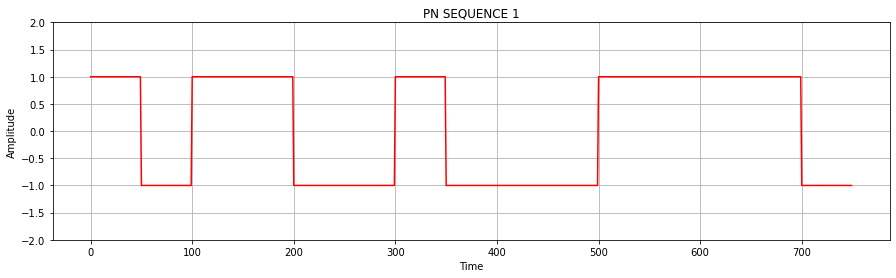

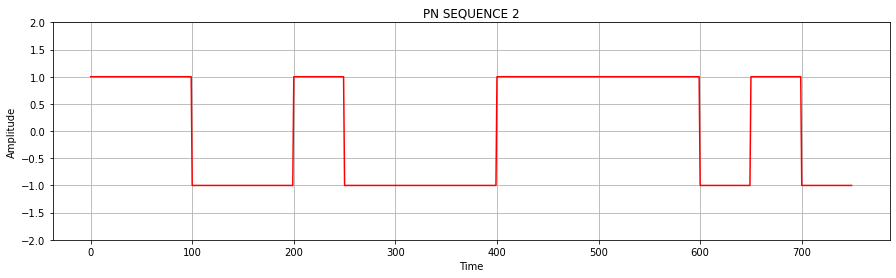

In [412]:
code_1 = max_len_seq(4,state = [1,0,1,1])[0]

code_2 = max_len_seq(4,state = [1,1,0,0])[0]

code_1 = np.array(code_1)*2-1
code_2 = np.array(code_2)*2-1

signal_plot(code_1,label = 'PN SEQUENCE 1')
signal_plot(code_2,label = 'PN SEQUENCE 2')

# **Code Multiplication**

In [413]:
def code_mul(sig,code):
  mul = []
  for i in range(len(sig)):
    for j in range(len(code[:len(sig1)])):
      mul.append(sig[i]*code[j])
  return np.array(mul)

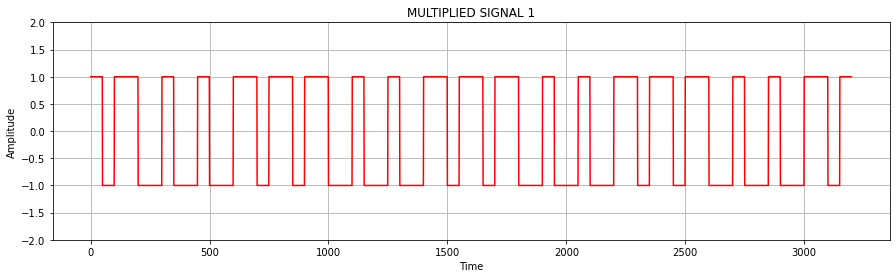

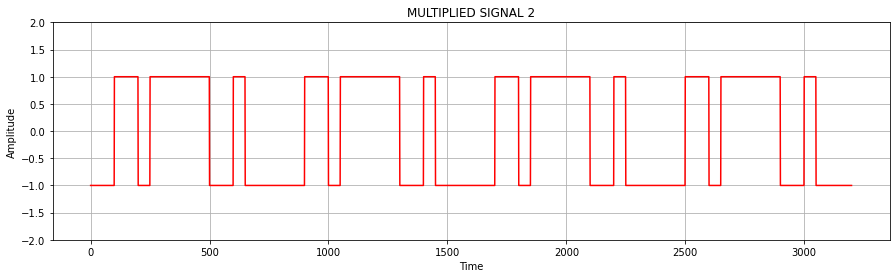

In [415]:
mul_1 = code_mul(sig1,code_1)
mul_2 = code_mul(sig2,code_2)

signal_plot(mul_1,label = 'MULTIPLIED SIGNAL 1')
signal_plot(mul_2,label = 'MULTIPLIED SIGNAL 2')

# **Combination of signals**

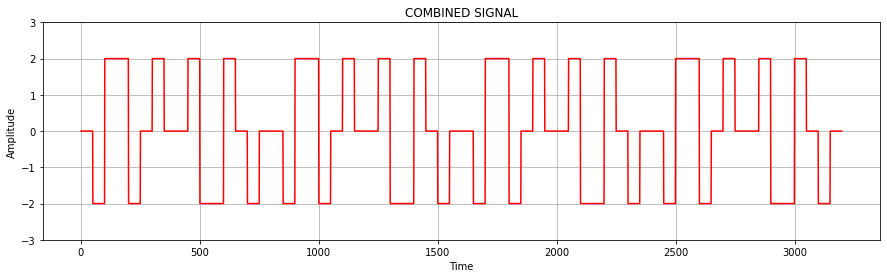

In [416]:
combined = (mul_1+mul_2)

signal_plot(combined,label = "COMBINED SIGNAL")

#**Receiver End**

# *CODE - 1*

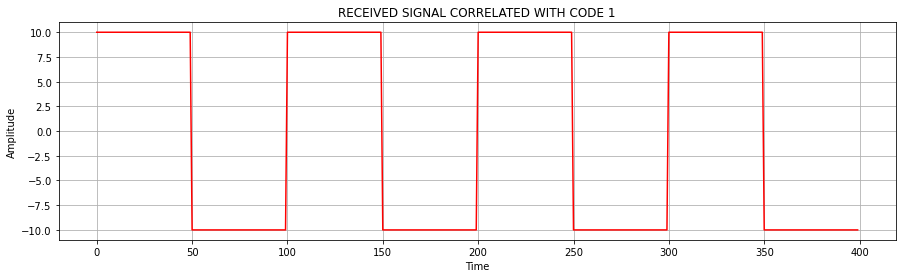

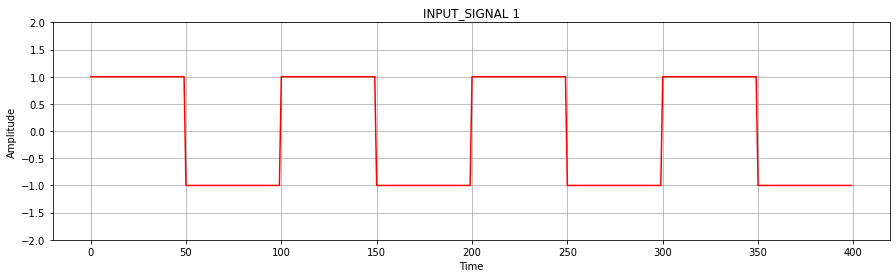

In [420]:
rx1 = []

for i in range(len(sig1)):
  temp = sum(combined[i*len(sig1):(i*len(sig1)+len(sig1))]*code_1[:len(sig1)])
  rx1.append(temp)

signal_plot(rx1,label = 'RECEIVED SIGNAL CORRELATED WITH CODE 1')
signal_plot(sig1,'INPUT_SIGNAL 1')

# *CODE 2*

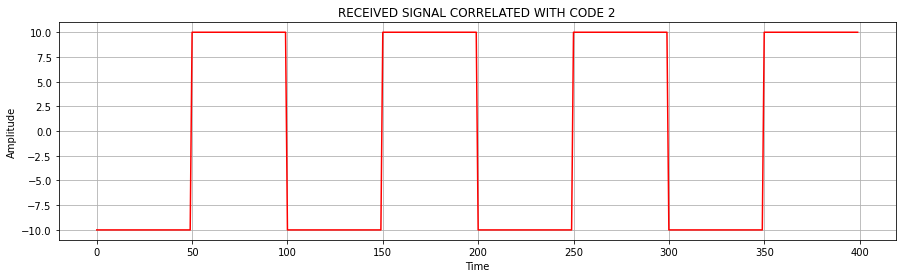

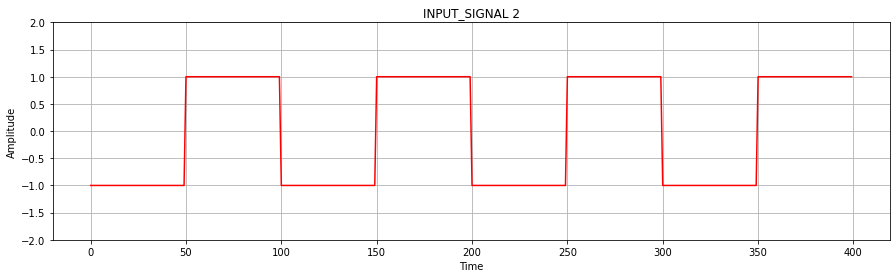

In [421]:
rx2 = []

for i in range(len(sig2)):
  temp = sum(combined[i*len(sig1):(i*len(sig1)+len(sig1))]*code_2[:len(sig2)])
  rx2.append(temp)

signal_plot(rx2,'RECEIVED SIGNAL CORRELATED WITH CODE 2')
signal_plot(sig2,'INPUT_SIGNAL 2')

#COMPLETE CDMA FLOW

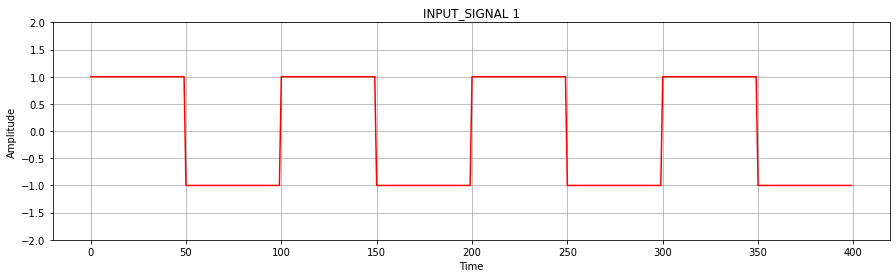

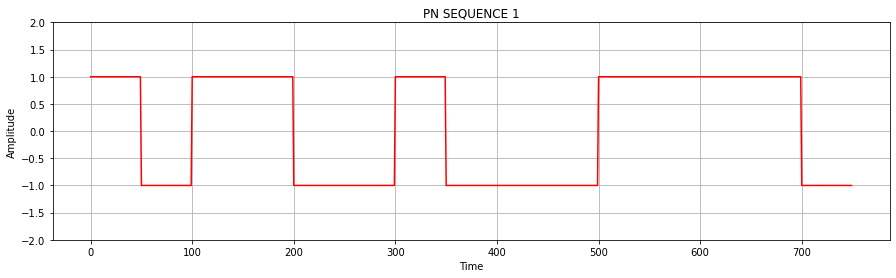

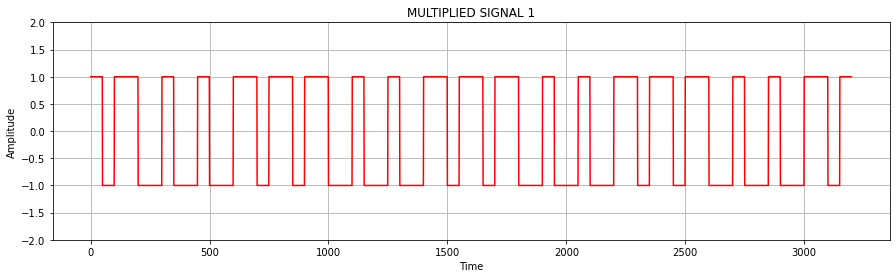

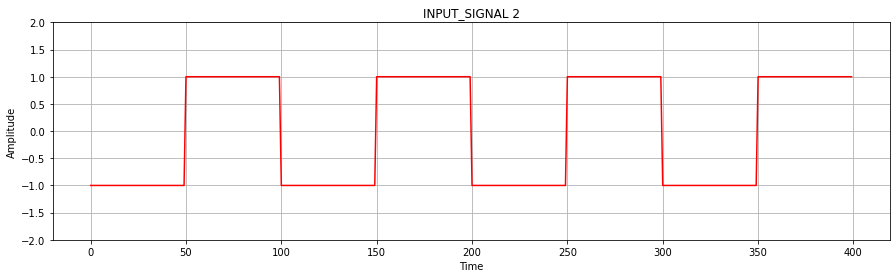

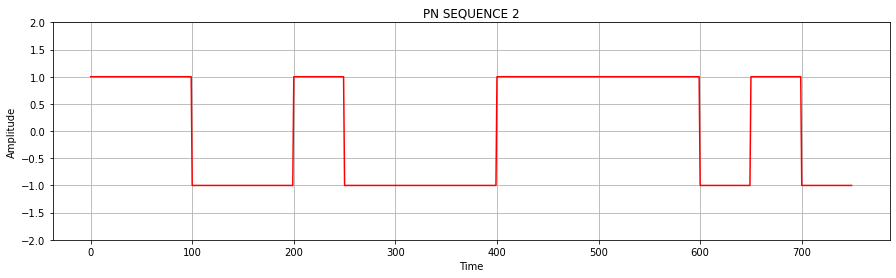

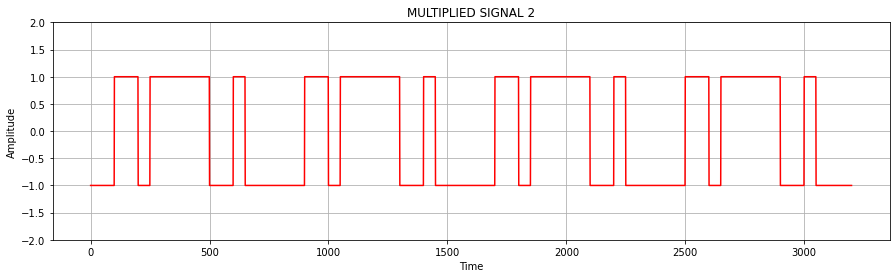

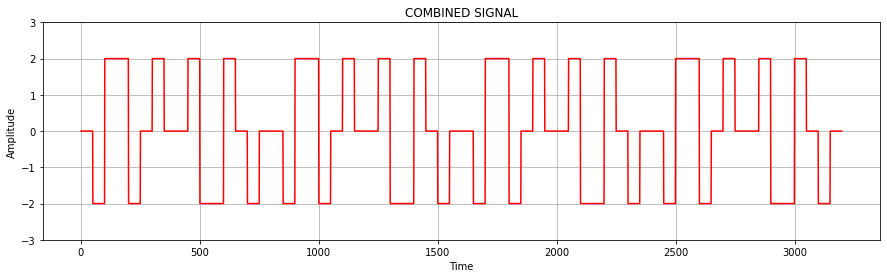

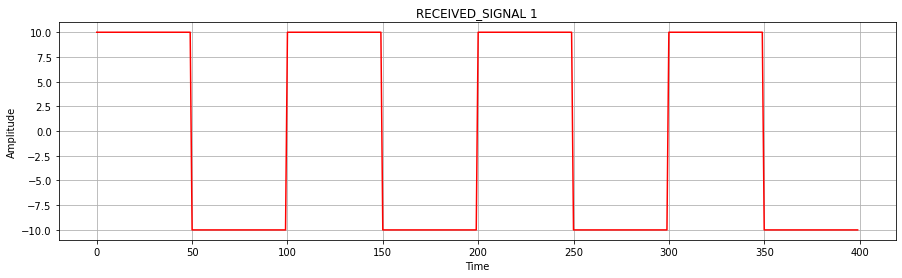

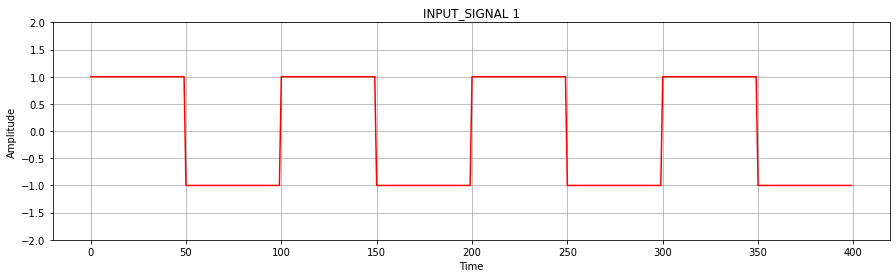

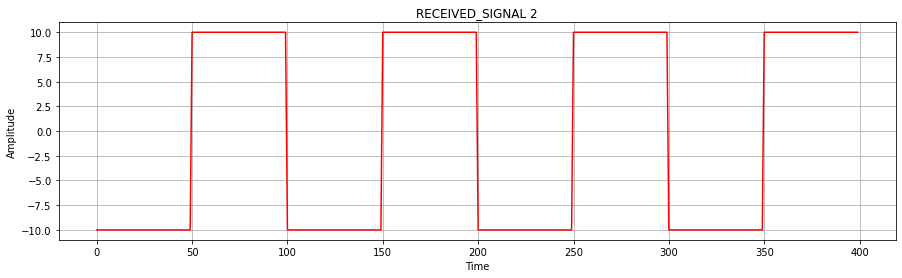

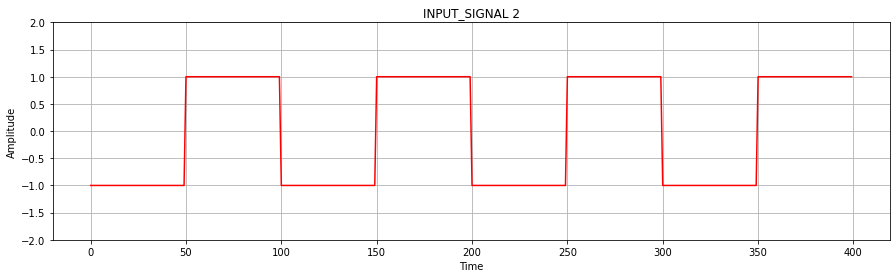

In [425]:
signal_plot(sig1,'INPUT_SIGNAL 1')
signal_plot(code_1,'PN SEQUENCE 1')
signal_plot(mul_1,'MULTIPLIED SIGNAL 1')

signal_plot(sig2,'INPUT_SIGNAL 2')
signal_plot(code_2,'PN SEQUENCE 2')
signal_plot(mul_2,'MULTIPLIED SIGNAL 2')

signal_plot(combined,'COMBINED SIGNAL')


signal_plot(rx1,'RECEIVED_SIGNAL 1')
signal_plot(sig1,'INPUT_SIGNAL 1')

signal_plot(rx2,'RECEIVED_SIGNAL 2')
signal_plot(sig2,'INPUT_SIGNAL 2')